# Simple Linear Regression with TensorFlow

## Import Libraries

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# tf.enable_eager_execution()

In [18]:
tf.__version__

'2.2.0'

## Hypothesis

In [3]:
# Reduce Mean Function
v =[1., 2., 3., 4.]
tf.reduce_mean(v) # 2.5

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [4]:
# Square Function
tf.square(3) # 9

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [5]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [6]:
W.numpy(), b.numpy()

(2.0, 0.5)

In [7]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

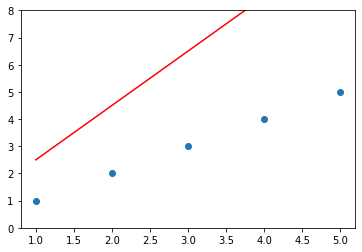

In [10]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

## Cost

In [11]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [12]:
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

## Parameter Update

In [13]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad) # equal to "-=" in python
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.75, 0.43)

(0.0, 8.0)

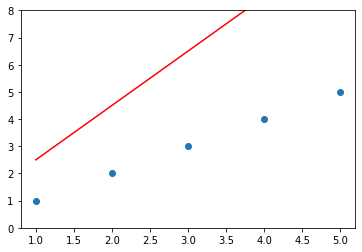

In [14]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

## Iterations

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059


(0.0, 8.0)

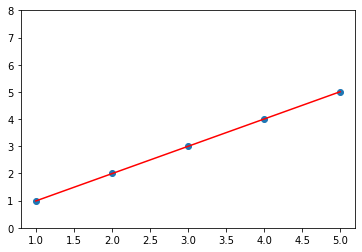

In [15]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 10 == 0: #don't print everything; print only a few things according to that condition (i%10==0)
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

## Predict

In [16]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)


## Full Code

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# tf.enable_eager_execution()

# Data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# W, b update
for i in range(100):
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

print()

# predict
print(W * 5 + b)
print(W * 2.5 + b)

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)


## Linear Regression using tf.keras

In [19]:
import numpy as np
import tensorflow as tf

x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

tf.model = tf.keras.Sequential()

# units == output shape, input_dim == input shape
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

sgd = tf.keras.optimizers.SGD(lr=0.1)  # SGD == standard gradient descendent, lr == learning rate
tf.model.compile(loss='mse', optimizer=sgd)  # mse == mean_squared_error, 1/m * sig (y'-y)^2

# prints summary of the model to the terminal
tf.model.summary()

# fit() executes training
tf.model.fit(x_train, y_train, epochs=200)

# predict() returns predicted value
y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 4.9636
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 2.2753
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 1.0656
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5198
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2723
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1589
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1058
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 0.0800
Epoch 9/200
1/1 [===============

1/1 [==============================] - 0s 2ms/step - loss: 2.7736e-04
Epoch 98/200
1/1 [==============================] - 0s 1ms/step - loss: 2.6100e-04
Epoch 99/200
1/1 [==============================] - 0s 2ms/step - loss: 2.4561e-04
Epoch 100/200
1/1 [==============================] - 0s 2ms/step - loss: 2.3112e-04
Epoch 101/200
1/1 [==============================] - 0s 2ms/step - loss: 2.1749e-04
Epoch 102/200
1/1 [==============================] - 0s 2ms/step - loss: 2.0466e-04
Epoch 103/200
1/1 [==============================] - 0s 2ms/step - loss: 1.9259e-04
Epoch 104/200
1/1 [==============================] - 0s 1ms/step - loss: 1.8123e-04
Epoch 105/200
1/1 [==============================] - 0s 3ms/step - loss: 1.7054e-04
Epoch 106/200
1/1 [==============================] - 0s 2ms/step - loss: 1.6048e-04
Epoch 107/200
1/1 [==============================] - 0s 1ms/step - loss: 1.5102e-04
Epoch 108/200
1/1 [==============================] - 0s 2ms/step - loss: 1.4211e-04
Epoch 10

1/1 [==============================] - 0s 2ms/step - loss: 7.6220e-07
Epoch 195/200
1/1 [==============================] - 0s 2ms/step - loss: 7.1724e-07
Epoch 196/200
1/1 [==============================] - 0s 2ms/step - loss: 6.7489e-07
Epoch 197/200
1/1 [==============================] - 0s 2ms/step - loss: 6.3513e-07
Epoch 198/200
1/1 [==============================] - 0s 2ms/step - loss: 5.9771e-07
Epoch 199/200
1/1 [==============================] - 0s 2ms/step - loss: 5.6243e-07
Epoch 200/200
1/1 [==============================] - 0s 1ms/step - loss: 5.2922e-07
[[-3.99879  ]
 [-2.9993775]]
